# William Bowman
# Homework 3 - Due 11/12/2021
# Data 3550 - Applied Predictive Modeling

## Will insert Question 1 Here

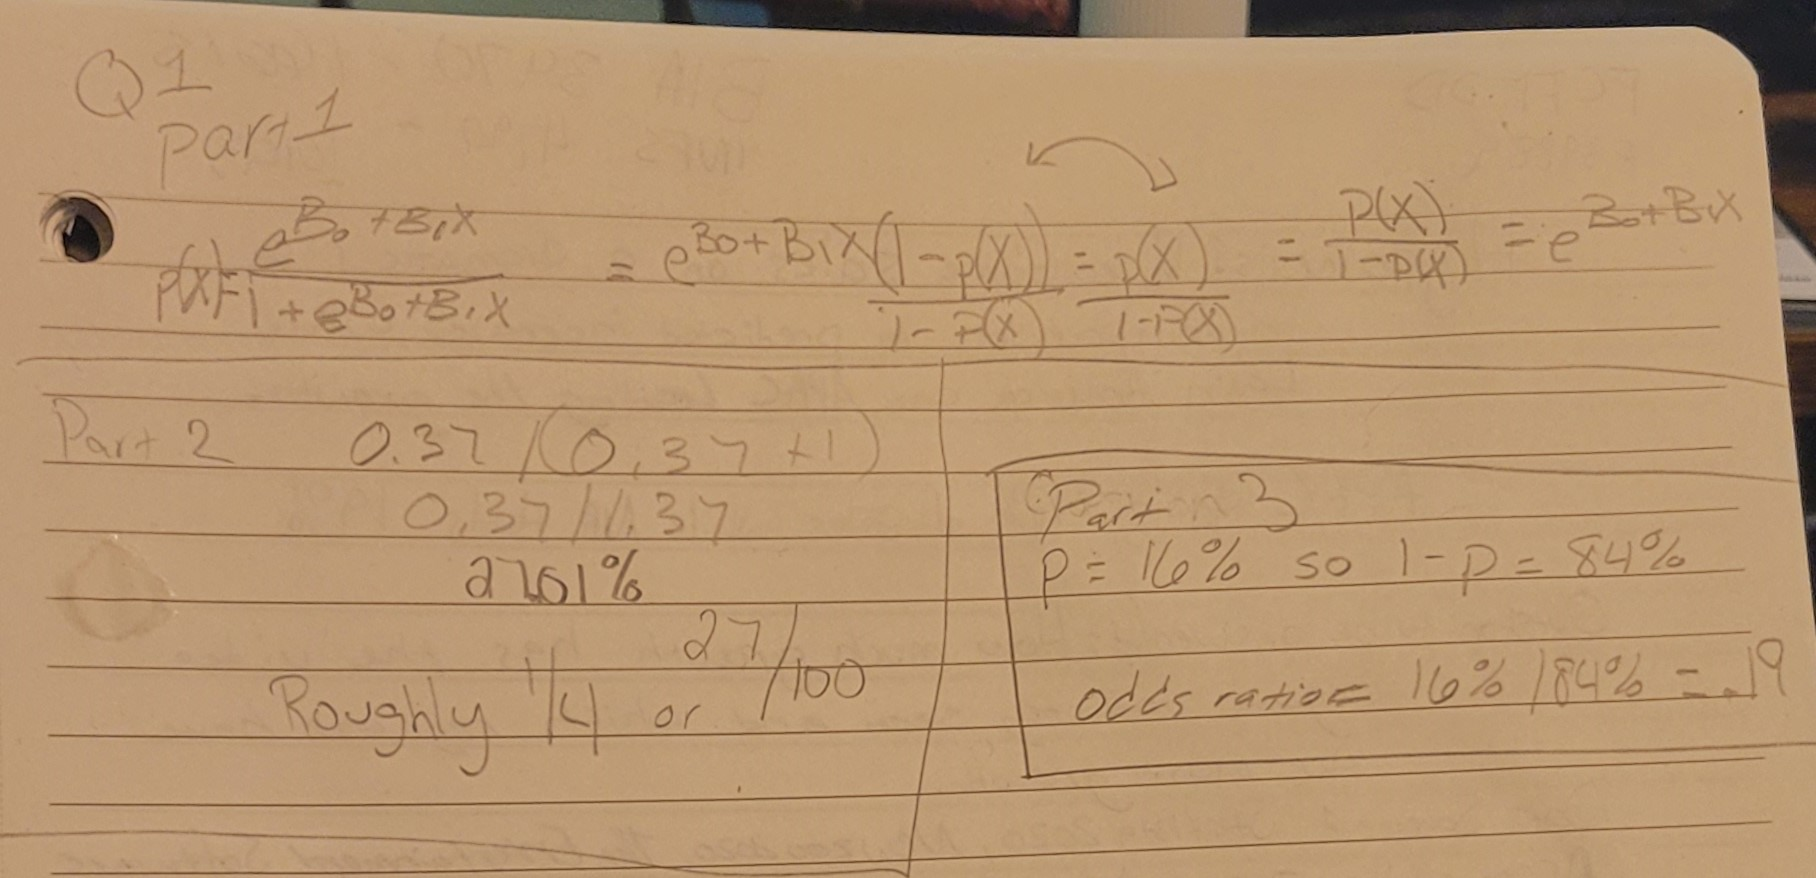

## Question 2 - Carseat Data to Predict Sales using Regression Trees. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score

%matplotlib inline
plt.style.use('seaborn-white')

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing dataset from CSV file
df_cs = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\Dataset\Carseats.csv') 

In [3]:
# Viewing the top 5 rows of the dataset. 
df_cs.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
#Importing the Missingno package to analyze any missing data
import missingno as msn

<AxesSubplot:>

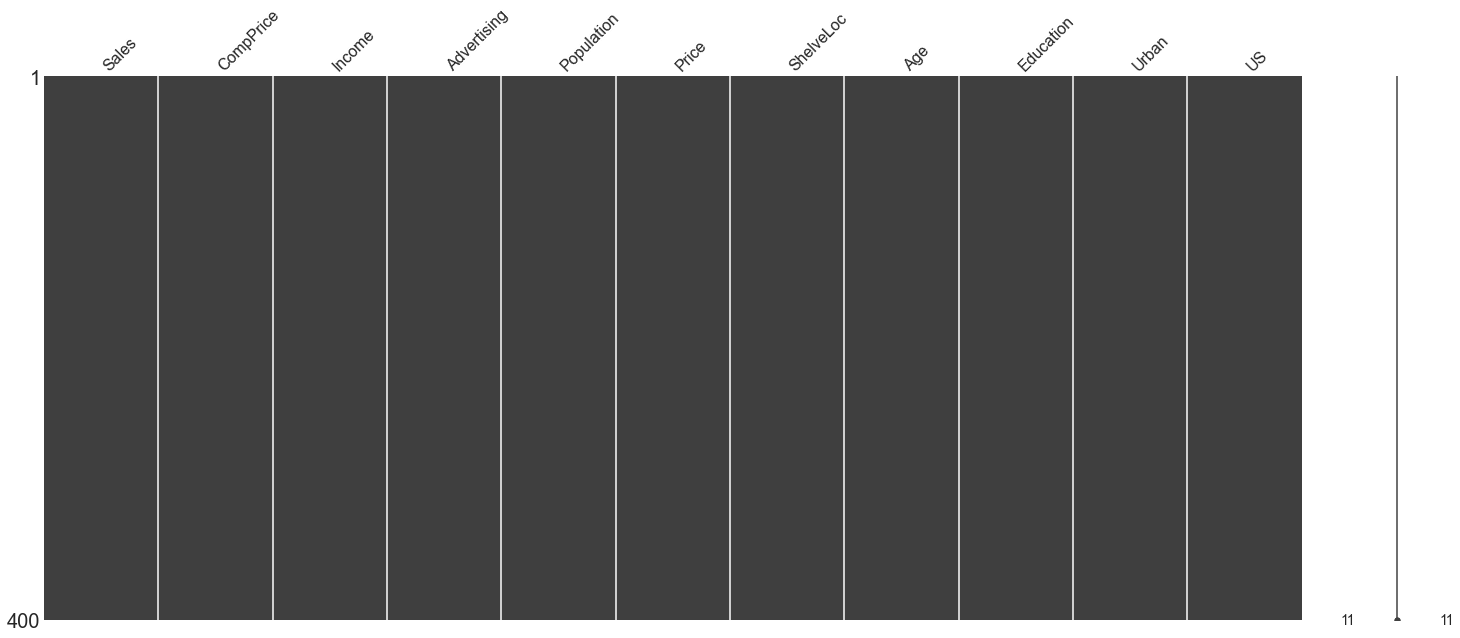

In [5]:
# .matrix will create a bar matrix of our data analyzing the missing data by variable also revealing any patterns in missingness. 
msn.matrix(df_cs)

In [6]:
# No nulls. Ok thats rare. 
df_cs.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### Since we have no null values we will proceed to preparing our data for analysis. 
#### First we will tranform some variables and set dummy variables for ShelveLoc

In [7]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

#### The below two lc.fit functions transform our data from Yes/No to 1/0

In [8]:
#No = 0 and Yes = 1
df_cs['Urban'] = lc.fit_transform(df_cs['Urban'])

In [9]:
df_cs.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban   US  
0         17      1  Yes  
1         10      1  Yes  
2         12      1  Yes  
3         14      1  Yes  
4         13      1   No

In [10]:
#No = 0 and Yes = 1
df_cs['US'] = lc.fit_transform(df_cs['US'])

In [11]:
df_cs.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [12]:
df_cs.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education       Urban          US  
count  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000    0.705000    0.645000  
std     23.676664   16.200297    2.620528    0.456614    0.479113  
min     24.000000   25.000000   10.000000    0.000000    0.000000  
25%    100.000000   39.750000   12.000000    0.000000    0.000000  
50%    117.000000   54.500000   14.000000    1.000000    1.000000  
75%    131.000000   66.000000   16.000000    1.000000    1.000000  
max    191.000000   80.000000   18.000000    1.000000    1.000000

In [13]:
#Sets the sales column to represent whether the row has high or low sales
df_cs['Sales'] = df_cs['Sales'].apply(lambda x: 1 if x > 8.0 else 0)

#### Creates a temporary data from containing the Ordinal coding for Good bad and Medium then attaches it to the dataframe.

In [14]:
TEMP_DICT = {'Good' : 3,
            'Medium' : 2,
            'Bad' : 1}
df_cs['ShelveLoc_Ordinal'] = df_cs.ShelveLoc.map(TEMP_DICT)
df_cs.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0      1        138      73           11         276    120       Bad   42   
1      1        111      48           16         260     83      Good   65   
2      1        113      35           10         269     80    Medium   59   
3      0        117     100            4         466     97    Medium   55   
4      0        141      64            3         340    128       Bad   38   

   Education  Urban  US  ShelveLoc_Ordinal  
0         17      1   1                  1  
1         10      1   1                  3  
2         12      1   1                  2  
3         14      1   1                  2  
4         13      1   0                  1

#### Drops ShelveLoc since we alrady converted it to an Ordinal Scale

In [15]:
df_cs = df_cs.drop('ShelveLoc', axis = 1)

#### Here we will declare our target and feature sets

In [16]:
y = df_cs.Sales
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: int64

In [17]:

X = df_cs.drop('Sales', axis = 1) # removes Sales from the datafram and recallibrates the axis. 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CompPrice          400 non-null    int64
 1   Income             400 non-null    int64
 2   Advertising        400 non-null    int64
 3   Population         400 non-null    int64
 4   Price              400 non-null    int64
 5   Age                400 non-null    int64
 6   Education          400 non-null    int64
 7   Urban              400 non-null    int32
 8   US                 400 non-null    int32
 9   ShelveLoc_Ordinal  400 non-null    int64
dtypes: int32(2), int64(8)
memory usage: 28.2 KB


#### Now we have two datasets ready to model so we can create our modeling parameters by splitting the data into train and test sets

In [18]:
#Question 2-1B
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Splits the training data to 80% and the testing set to 20%

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CompPrice          320 non-null    int64
 1   Income             320 non-null    int64
 2   Advertising        320 non-null    int64
 3   Population         320 non-null    int64
 4   Price              320 non-null    int64
 5   Age                320 non-null    int64
 6   Education          320 non-null    int64
 7   Urban              320 non-null    int32
 8   US                 320 non-null    int32
 9   ShelveLoc_Ordinal  320 non-null    int64
dtypes: int32(2), int64(8)
memory usage: 25.0 KB


In [20]:
X_train.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  Urban  \
3          117     100            4         466     97   55         14      1   
18         110     110            0         408     68   46         17      0   
202        121      78            4         413    130   46         10      0   
250        137     105           10         435    156   72         14      1   
274        135      93            2          67    119   34         11      1   

     US  ShelveLoc_Ordinal  
3     1                  2  
18    1                  3  
202   1                  1  
250   1                  3  
274   1                  2

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 209 to 289
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CompPrice          80 non-null     int64
 1   Income             80 non-null     int64
 2   Advertising        80 non-null     int64
 3   Population         80 non-null     int64
 4   Price              80 non-null     int64
 5   Age                80 non-null     int64
 6   Education          80 non-null     int64
 7   Urban              80 non-null     int32
 8   US                 80 non-null     int32
 9   ShelveLoc_Ordinal  80 non-null     int64
dtypes: int32(2), int64(8)
memory usage: 6.2 KB


### Now we will begin building our Decision Tree

In [22]:
reg_tree = DecisionTreeRegressor().fit(X_train,y_train)
DT_predict = reg_tree.predict(X_test) #Predictions on Testing data


In [23]:
cm = pd.DataFrame(confusion_matrix(y_test, DT_predict), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted  No  Yes
True              
No         35    8
Yes        12   25

# Question 2-2A
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

In [24]:
y_predictions = reg_tree.predict(X_test)

In [25]:
score_train = reg_tree.score(X_train, y_train)
print(score_train)
print("")


1.0



In [26]:
score_test = reg_tree.score(X_test, y_test)
print(score_test)
print("")

-0.0056568196103079504



In [27]:
print(classification_report(y_test, reg_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        43
           1       0.76      0.68      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80



In [28]:
acc_score = accuracy_score(y_test, y_predictions)
print(acc_score)
print("")

0.75



In [29]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predictions), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted  No  Yes
True              
No         35    8
Yes        12   25

plot_confusion_matrix(reg_tree, X_test, y_test,cmap="Blues", values_format='d')
plt.show()

In [30]:
print(classification_report(y_test, reg_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        43
           1       0.76      0.68      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80



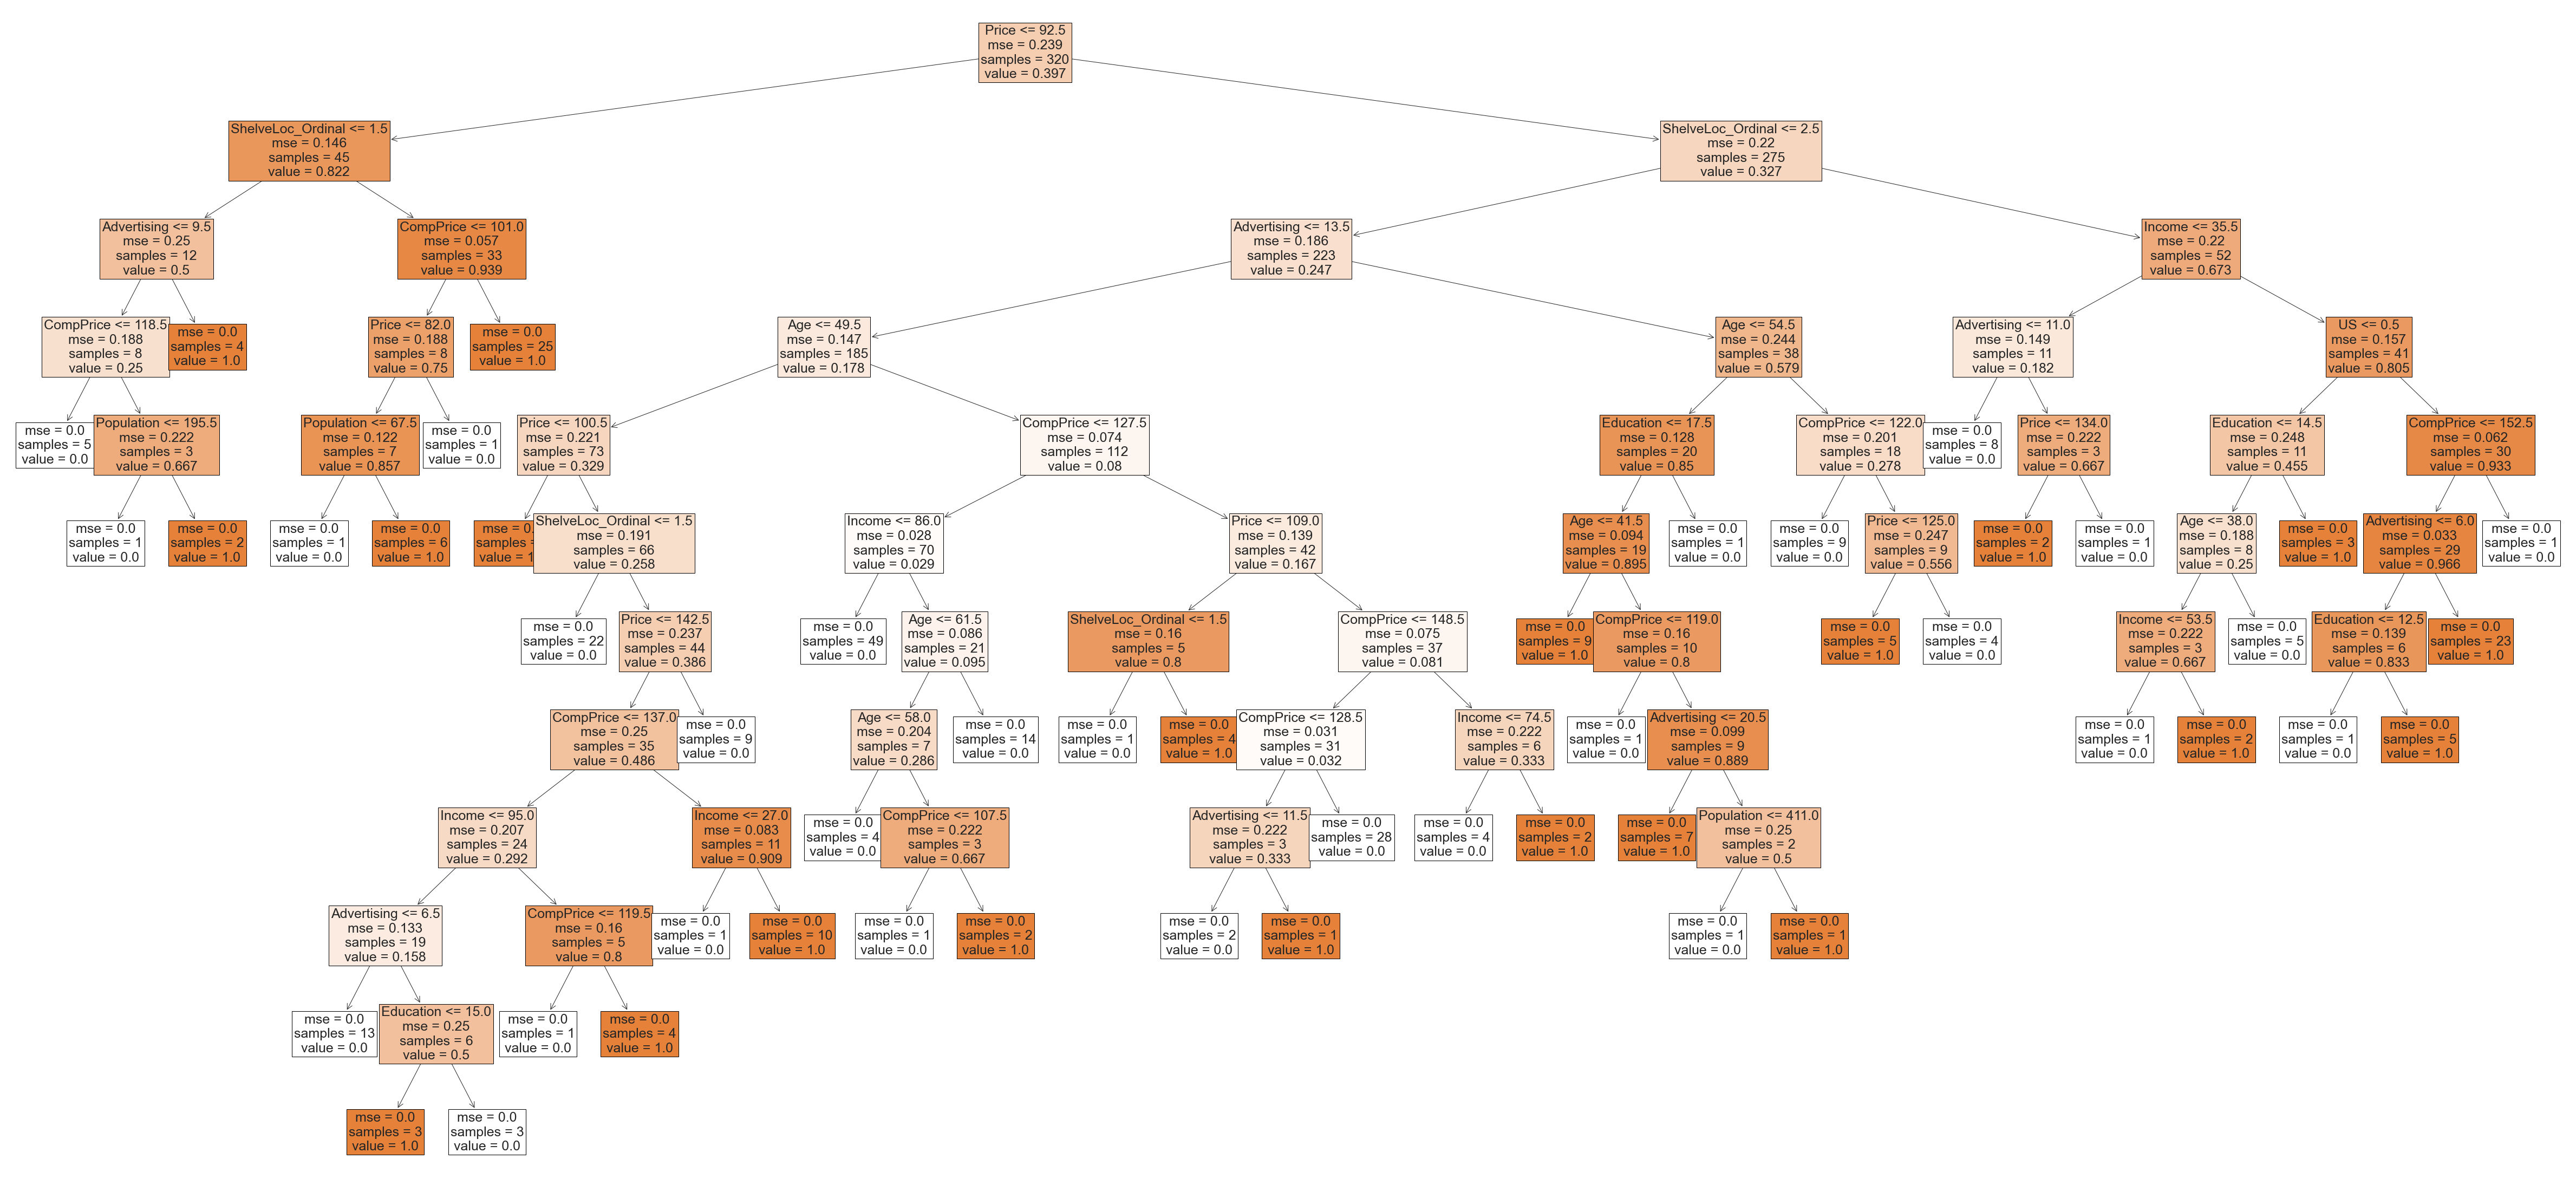

In [31]:
fig = plt.figure(figsize=(85,40))
tree.plot_tree(reg_tree,feature_names= X.columns,class_names=['Low', 'High'], fontsize = 25, filled=True)
plt.show()

## Question 2-2B
### Interpretation of our Model : Example - We have a Carseat that Costs 110.50 Dollars, ShelveLoc of 2, Age of 60, Advertising of 20, A Comp Price of 133 what classification would our Model give the observation?

### Since the customer pays 110.50 we would continue RIGHT to ShelveLoc which is 2 so we will continue LEFT to Advertising which is 20 so we continue RIGHT Age is 60 so we continue RIGHT again so we continue to CompPrice is 133 so once again we go RIGHT we are now at price which we already knew is 110.50 so we go LEFT and are classified as HIGH SALES

In [32]:
import statsmodels.api as sm

In [33]:
DT_test_rmse= sm.tools.eval_measures.rmse(y_test, y_predictions, axis=0)

In [34]:
# Question 2-2C
DT_test_rmse

0.5

In [35]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [36]:
#Question 2-2C
mean_absolute_percentage_error(y_test, y_predictions)*100

4.503599627370497e+16

### We obtained a RMSE Score of 0.474 showing almost half the data is centered around our model. and a MAPE of 4.50 which would be an accuracy score of 95.50%. This seems odd since we have a recall of .78 which states we correctly classify positive predictions 78% of the time. 

In [37]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.7122979863451732), (4, 0.7320888427966468), (5, 0.7097485092040446), (6, 0.7323481116584566), (7, 0.7272923688531673), (8, 0.7323913231354248), (9, 0.7047359778757237), (10, 0.7397804856970012), (11, 0.7222366260478782), (12, 0.7321752657505833), (13, 0.7372742200328407), (14, 0.7272491573761991), (15, 0.707199032062916), (16, 0.7348111658456487), (17, 0.7422867513611615), (18, 0.7323481116584565), (19, 0.7372742200328407)]


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.74375 {'max_depth': 10}


In [40]:
clf1 = DecisionTreeRegressor(max_depth = 3) # which also correspondes to best ccp_alpha
clf1.fit(X_train, y_train)
train_pred = clf1.predict(X_train)
test_pred = clf1.predict(X_test)
print(clf1.score(X_train, y_train),clf1.score(X_test, y_test) )

0.3804961438066773 0.3462625721278503


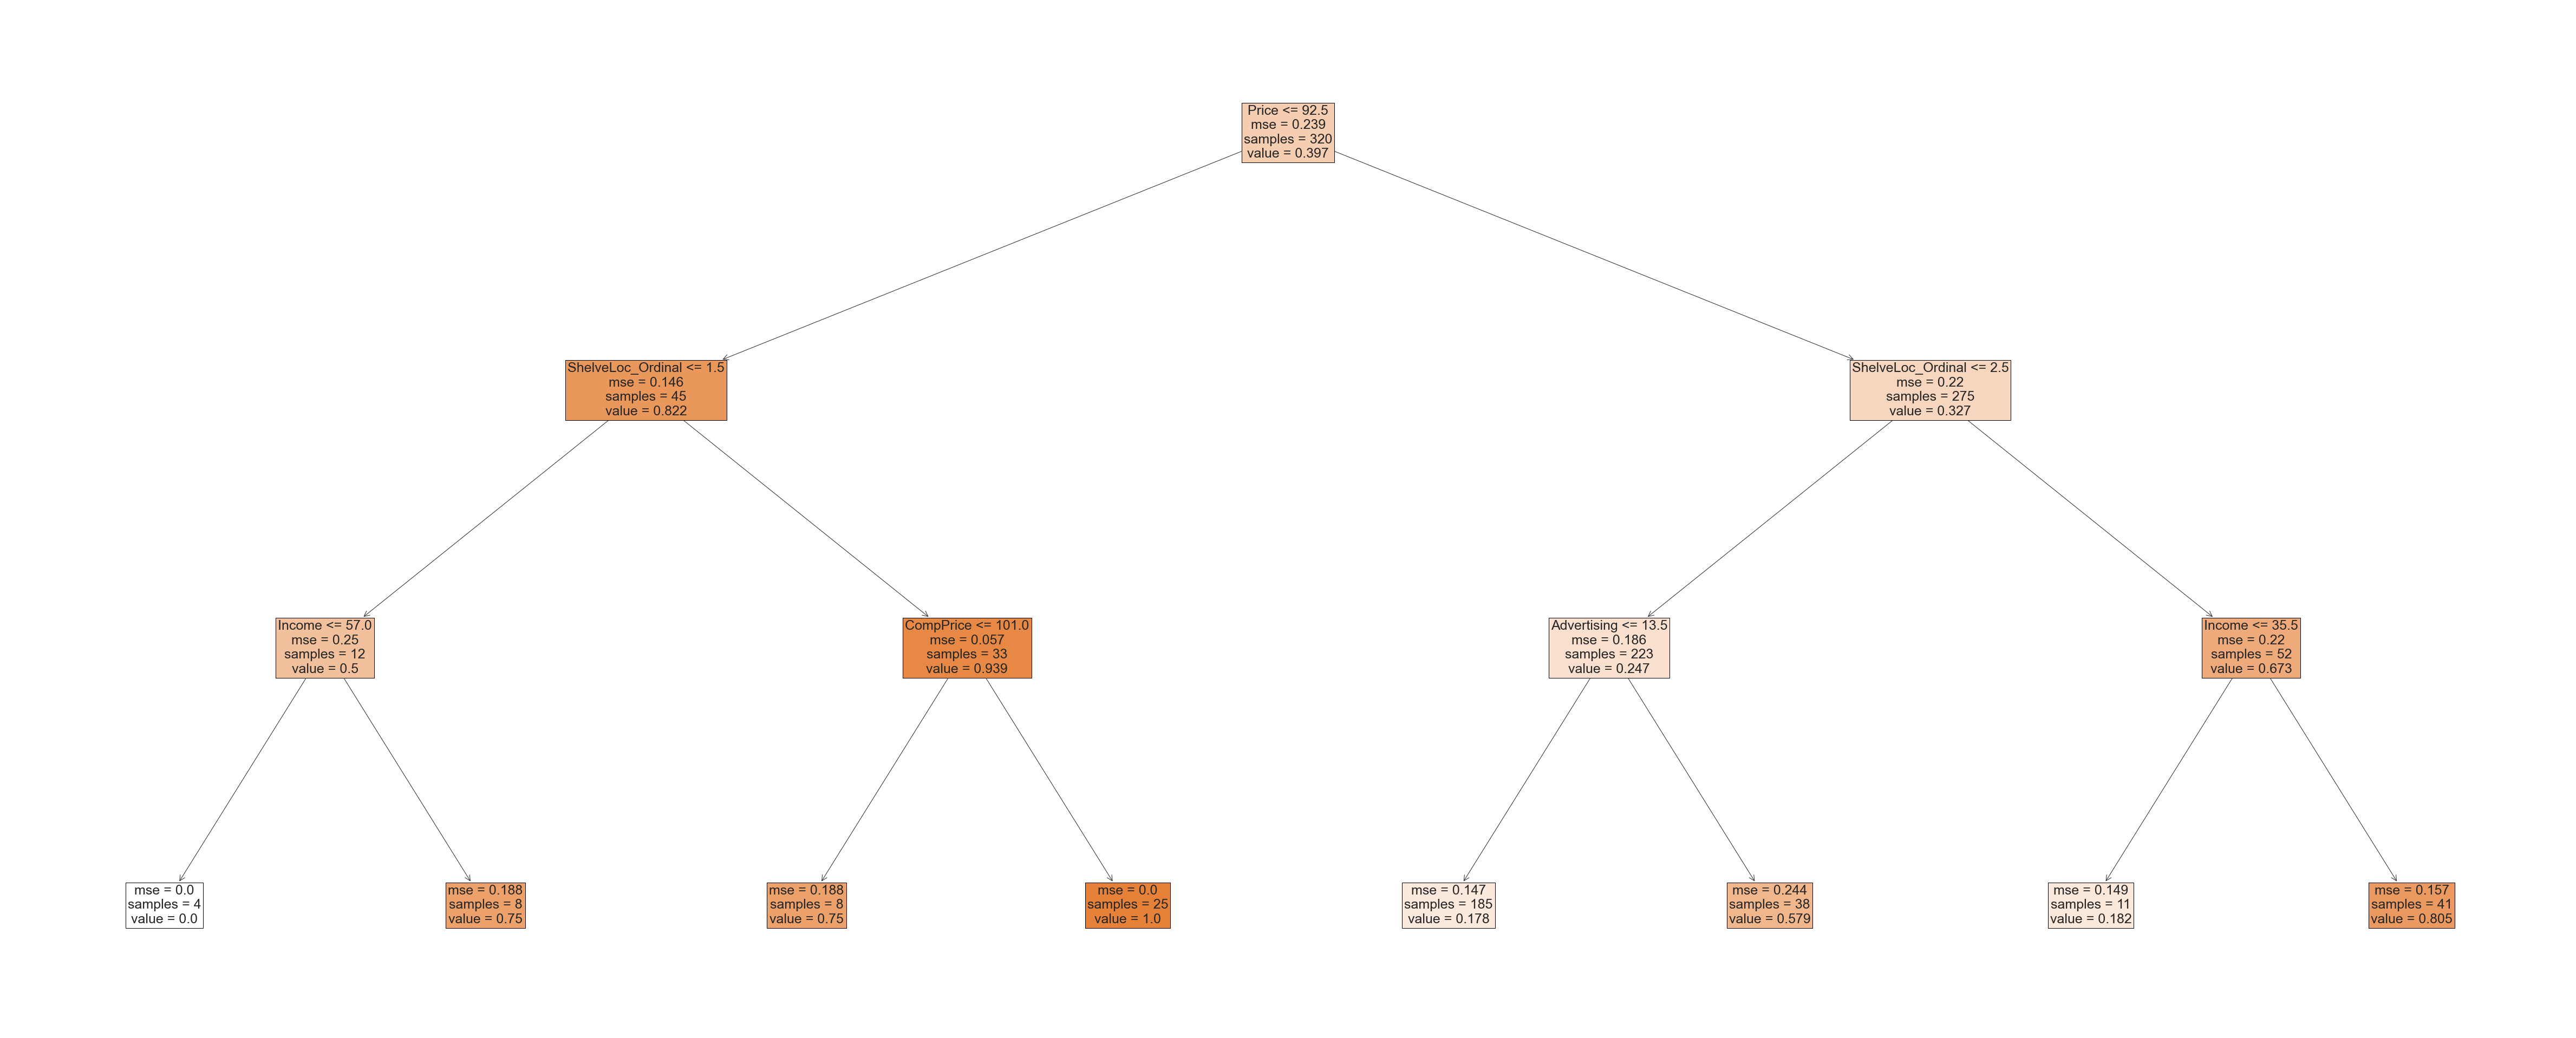

In [41]:
fig = plt.figure(figsize=(85,35))
tree.plot_tree(clf1,feature_names= X.columns, fontsize = 25, filled=True)
plt.show()

In [42]:
y_pred1 = clf.predict(X_test)

In [43]:
y_pred = clf1.predict(X_test)

In [44]:
from sklearn import metrics

In [45]:
# Question 2-3B
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.25
Mean Squared Error: 0.1625150387100922


#### Question 2-3B
### Yes Pruning did slightly increase our MSE

In [46]:
from sklearn.ensemble import BaggingClassifier


In [47]:
#Question 2-4A
THEBAG = BaggingRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)

In [48]:
y_pred1 = THEBAG.predict(X_test)

In [49]:
print(THEBAG.score(X_train, y_train),THEBAG.score(X_test, y_test) )

0.8797601077067438 0.42023884349465734


In [50]:
THEBAG_test_rmse= sm.tools.eval_measures.rmse(y_test, y_pred1, axis=0)

In [51]:
#Question 2-4B
THEBAG_test_rmse

0.37963798545456434

In [52]:
#Question 2-4B
mean_absolute_percentage_error(y_test, y_pred1)*100

6.642809450371484e+16

In [53]:
feature_importances = np.mean([tree.feature_importances_ for tree in THEBAG.estimators_ ], axis=0)

In [54]:
feature_importances = pd.DataFrame(feature_importances)

In [55]:
#Question 2-4C
names = pd.DataFrame(list(X.columns))
df_feature_importances = pd.concat([feature_importances, names], axis = 1)
df_feature_importances.columns = ['Importance', 'Features']
df_feature_importances.sort_values('Importance', ascending = False)

Importance           Features
4    0.260184              Price
5    0.139417                Age
2    0.133735        Advertising
9    0.129263  ShelveLoc_Ordinal
0    0.109153          CompPrice
1    0.088091             Income
3    0.069489         Population
6    0.036669          Education
7    0.019060              Urban
8    0.014939                 US

### After Calculating the Feature Importances we can see that Ca, OldPeak, Age, and the created ChestPain_asymptomatic variable are our top 4 most important features. 

In [56]:
#Question 2-5A
clf_rf = RandomForestRegressor(random_state = 42, n_estimators=100, max_depth = 5) #max_depth = 5,specify max depth otherwise it may overfit
clf_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [57]:
y_pred_rf = clf_rf.predict(X_test)

In [58]:
clf_rf_test_rmse= sm.tools.eval_measures.rmse(y_test, y_pred_rf, axis=0)

In [59]:
# Question 2-5B
clf_rf_test_rmse

0.38391254451534307

In [60]:
# Question 2-5B
mean_absolute_percentage_error(y_test, y_pred_rf)*100

7.0579084619999576e+16

In [61]:
feature_importances = np.mean([     tree.feature_importances_ for tree in clf_rf.estimators_ ], axis=0)

In [62]:
feature_importances = pd.DataFrame(feature_importances)

In [63]:
# Question 2-5C
names = pd.DataFrame(list(X.columns))
df_feature_importances = pd.concat([feature_importances, names], axis = 1)
df_feature_importances.columns = ['Importance', 'Features']
df_feature_importances.sort_values('Importance', ascending = False)

Importance           Features
4    0.310362              Price
9    0.187389  ShelveLoc_Ordinal
2    0.152767        Advertising
5    0.107220                Age
0    0.098018          CompPrice
1    0.064880             Income
3    0.044022         Population
6    0.018159          Education
8    0.009078                 US
7    0.008104              Urban

### After calculating the feature importance we can see that Ca, ChestPain_asymptomatic, OldPeak, and Age are the most important features in our model. 

## Part 3

In [64]:
df_heart = pd.read_csv(r'C:\Users\willi\OneDrive\Desktop\Dataset\heart.csv', index_col = 0 )

In [65]:
df_heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1   63    1       typical     145   233    1        2    150      0      2.3   
2   67    1  asymptomatic     160   286    0        2    108      1      1.5   
3   67    1  asymptomatic     120   229    0        2    129      1      2.6   
4   37    1    nonanginal     130   250    0        0    187      0      3.5   
5   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
1      3  0.0       fixed   No  
2      2  3.0      normal  Yes  
3      2  2.0  reversable  Yes  
4      3  0.0      normal   No  
5      1  0.0      normal   No

In [66]:
df_heart.AHD.replace(('Yes', 'No'), (1, 0), inplace=True)

In [67]:
df_heart.ChestPain.unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [68]:
df_h = pd.get_dummies(df_heart, columns=['ChestPain'])

In [69]:
df_h = pd.get_dummies(df_h, columns=['Thal'])

In [70]:
df_h

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
1     63    1     145   233    1        2    150      0      2.3      3  0.0   
2     67    1     160   286    0        2    108      1      1.5      2  3.0   
3     67    1     120   229    0        2    129      1      2.6      2  2.0   
4     37    1     130   250    0        0    187      0      3.5      3  0.0   
5     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
299   45    1     110   264    0        0    132      0      1.2      2  0.0   
300   68    1     144   193    1        0    141      0      3.4      2  2.0   
301   57    1     130   131    0        0    115      1      1.2      2  1.0   
302   57    0     130   236    0        2    174      0      0.0      2  1.0   
303   38    1     138   175    0        0    173      0      0.0      1  NaN   

     AHD  ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
1      0                       0                     0                     0   
2      1                       1                     0                     0   
3      1                       1                     0                     0   
4      0                       0                     1                     0   
5      0                       0                     0                     1   
..   ...                     ...                   ...                   ...   
299    1                       0                     0                     0   
300    1                       1                     0                     0   
301    1                       1                     0                     0   
302    1                       0                     0                     1   
303    0                       0                     1                     0   

     ChestPain_typical  Thal_fixed  Thal_normal  Thal_reversable  
1                    1           1            0                0  
2                    0           0            1                0  
3                    0           0            0                1  
4                    0           0            1                0  
5                    0           0            1                0  
..                 ...         ...          ...              ...  
299                  1           0            0                1  
300                  0           0            0                1  
301                  0           0            0                1  
302                  0           0            1                0  
303                  0           0            1                0  

[303 rows x 19 columns]

In [71]:
df_h

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
1     63    1     145   233    1        2    150      0      2.3      3  0.0   
2     67    1     160   286    0        2    108      1      1.5      2  3.0   
3     67    1     120   229    0        2    129      1      2.6      2  2.0   
4     37    1     130   250    0        0    187      0      3.5      3  0.0   
5     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
299   45    1     110   264    0        0    132      0      1.2      2  0.0   
300   68    1     144   193    1        0    141      0      3.4      2  2.0   
301   57    1     130   131    0        0    115      1      1.2      2  1.0   
302   57    0     130   236    0        2    174      0      0.0      2  1.0   
303   38    1     138   175    0        0    173      0      0.0      1  NaN   

     AHD  ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
1      0                       0                     0                     0   
2      1                       1                     0                     0   
3      1                       1                     0                     0   
4      0                       0                     1                     0   
5      0                       0                     0                     1   
..   ...                     ...                   ...                   ...   
299    1                       0                     0                     0   
300    1                       1                     0                     0   
301    1                       1                     0                     0   
302    1                       0                     0                     1   
303    0                       0                     1                     0   

     ChestPain_typical  Thal_fixed  Thal_normal  Thal_reversable  
1                    1           1            0                0  
2                    0           0            1                0  
3                    0           0            0                1  
4                    0           0            1                0  
5                    0           0            1                0  
..                 ...         ...          ...              ...  
299                  1           0            0                1  
300                  0           0            0                1  
301                  0           0            0                1  
302                  0           0            1                0  
303                  0           0            1                0  

[303 rows x 19 columns]

In [72]:
df_h.isnull().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        4
AHD                       0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
dtype: int64

In [73]:
df_h.dropna()

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
1     63    1     145   233    1        2    150      0      2.3      3  0.0   
2     67    1     160   286    0        2    108      1      1.5      2  3.0   
3     67    1     120   229    0        2    129      1      2.6      2  2.0   
4     37    1     130   250    0        0    187      0      3.5      3  0.0   
5     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
298   57    0     140   241    0        0    123      1      0.2      2  0.0   
299   45    1     110   264    0        0    132      0      1.2      2  0.0   
300   68    1     144   193    1        0    141      0      3.4      2  2.0   
301   57    1     130   131    0        0    115      1      1.2      2  1.0   
302   57    0     130   236    0        2    174      0      0.0      2  1.0   

     AHD  ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
1      0                       0                     0                     0   
2      1                       1                     0                     0   
3      1                       1                     0                     0   
4      0                       0                     1                     0   
5      0                       0                     0                     1   
..   ...                     ...                   ...                   ...   
298    1                       1                     0                     0   
299    1                       0                     0                     0   
300    1                       1                     0                     0   
301    1                       1                     0                     0   
302    1                       0                     0                     1   

     ChestPain_typical  Thal_fixed  Thal_normal  Thal_reversable  
1                    1           1            0                0  
2                    0           0            1                0  
3                    0           0            0                1  
4                    0           0            1                0  
5                    0           0            1                0  
..                 ...         ...          ...              ...  
298                  0           0            0                1  
299                  1           0            0                1  
300                  0           0            0                1  
301                  0           0            0                1  
302                  0           0            1                0  

[299 rows x 19 columns]

In [74]:
df_h

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
1     63    1     145   233    1        2    150      0      2.3      3  0.0   
2     67    1     160   286    0        2    108      1      1.5      2  3.0   
3     67    1     120   229    0        2    129      1      2.6      2  2.0   
4     37    1     130   250    0        0    187      0      3.5      3  0.0   
5     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
299   45    1     110   264    0        0    132      0      1.2      2  0.0   
300   68    1     144   193    1        0    141      0      3.4      2  2.0   
301   57    1     130   131    0        0    115      1      1.2      2  1.0   
302   57    0     130   236    0        2    174      0      0.0      2  1.0   
303   38    1     138   175    0        0    173      0      0.0      1  NaN   

     AHD  ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
1      0                       0                     0                     0   
2      1                       1                     0                     0   
3      1                       1                     0                     0   
4      0                       0                     1                     0   
5      0                       0                     0                     1   
..   ...                     ...                   ...                   ...   
299    1                       0                     0                     0   
300    1                       1                     0                     0   
301    1                       1                     0                     0   
302    1                       0                     0                     1   
303    0                       0                     1                     0   

     ChestPain_typical  Thal_fixed  Thal_normal  Thal_reversable  
1                    1           1            0                0  
2                    0           0            1                0  
3                    0           0            0                1  
4                    0           0            1                0  
5                    0           0            1                0  
..                 ...         ...          ...              ...  
299                  1           0            0                1  
300                  0           0            0                1  
301                  0           0            0                1  
302                  0           0            1                0  
303                  0           0            1                0  

[303 rows x 19 columns]

In [75]:
df_h.dropna()

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
1     63    1     145   233    1        2    150      0      2.3      3  0.0   
2     67    1     160   286    0        2    108      1      1.5      2  3.0   
3     67    1     120   229    0        2    129      1      2.6      2  2.0   
4     37    1     130   250    0        0    187      0      3.5      3  0.0   
5     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
298   57    0     140   241    0        0    123      1      0.2      2  0.0   
299   45    1     110   264    0        0    132      0      1.2      2  0.0   
300   68    1     144   193    1        0    141      0      3.4      2  2.0   
301   57    1     130   131    0        0    115      1      1.2      2  1.0   
302   57    0     130   236    0        2    174      0      0.0      2  1.0   

     AHD  ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
1      0                       0                     0                     0   
2      1                       1                     0                     0   
3      1                       1                     0                     0   
4      0                       0                     1                     0   
5      0                       0                     0                     1   
..   ...                     ...                   ...                   ...   
298    1                       1                     0                     0   
299    1                       0                     0                     0   
300    1                       1                     0                     0   
301    1                       1                     0                     0   
302    1                       0                     0                     1   

     ChestPain_typical  Thal_fixed  Thal_normal  Thal_reversable  
1                    1           1            0                0  
2                    0           0            1                0  
3                    0           0            0                1  
4                    0           0            1                0  
5                    0           0            1                0  
..                 ...         ...          ...              ...  
298                  0           0            0                1  
299                  1           0            0                1  
300                  0           0            0                1  
301                  0           0            0                1  
302                  0           0            1                0  

[299 rows x 19 columns]

In [76]:
mean_value = df_h['Ca'].mean()

In [77]:
df_h['Ca'].fillna(value=mean_value, inplace=True)

In [78]:
y = df_h.AHD
y.head()


1    0
2    1
3    1
4    0
5    0
Name: AHD, dtype: int64

In [79]:
X = df_h.drop('AHD', axis = 1) # removes AHD from the datafram and recallibrates the axis. 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   RestBP                  303 non-null    int64  
 3   Chol                    303 non-null    int64  
 4   Fbs                     303 non-null    int64  
 5   RestECG                 303 non-null    int64  
 6   MaxHR                   303 non-null    int64  
 7   ExAng                   303 non-null    int64  
 8   Oldpeak                 303 non-null    float64
 9   Slope                   303 non-null    int64  
 10  Ca                      303 non-null    float64
 11  ChestPain_asymptomatic  303 non-null    uint8  
 12  ChestPain_nonanginal    303 non-null    uint8  
 13  ChestPain_nontypical    303 non-null    uint8  
 14  ChestPain_typical       303 non-null    ui

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [81]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [82]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

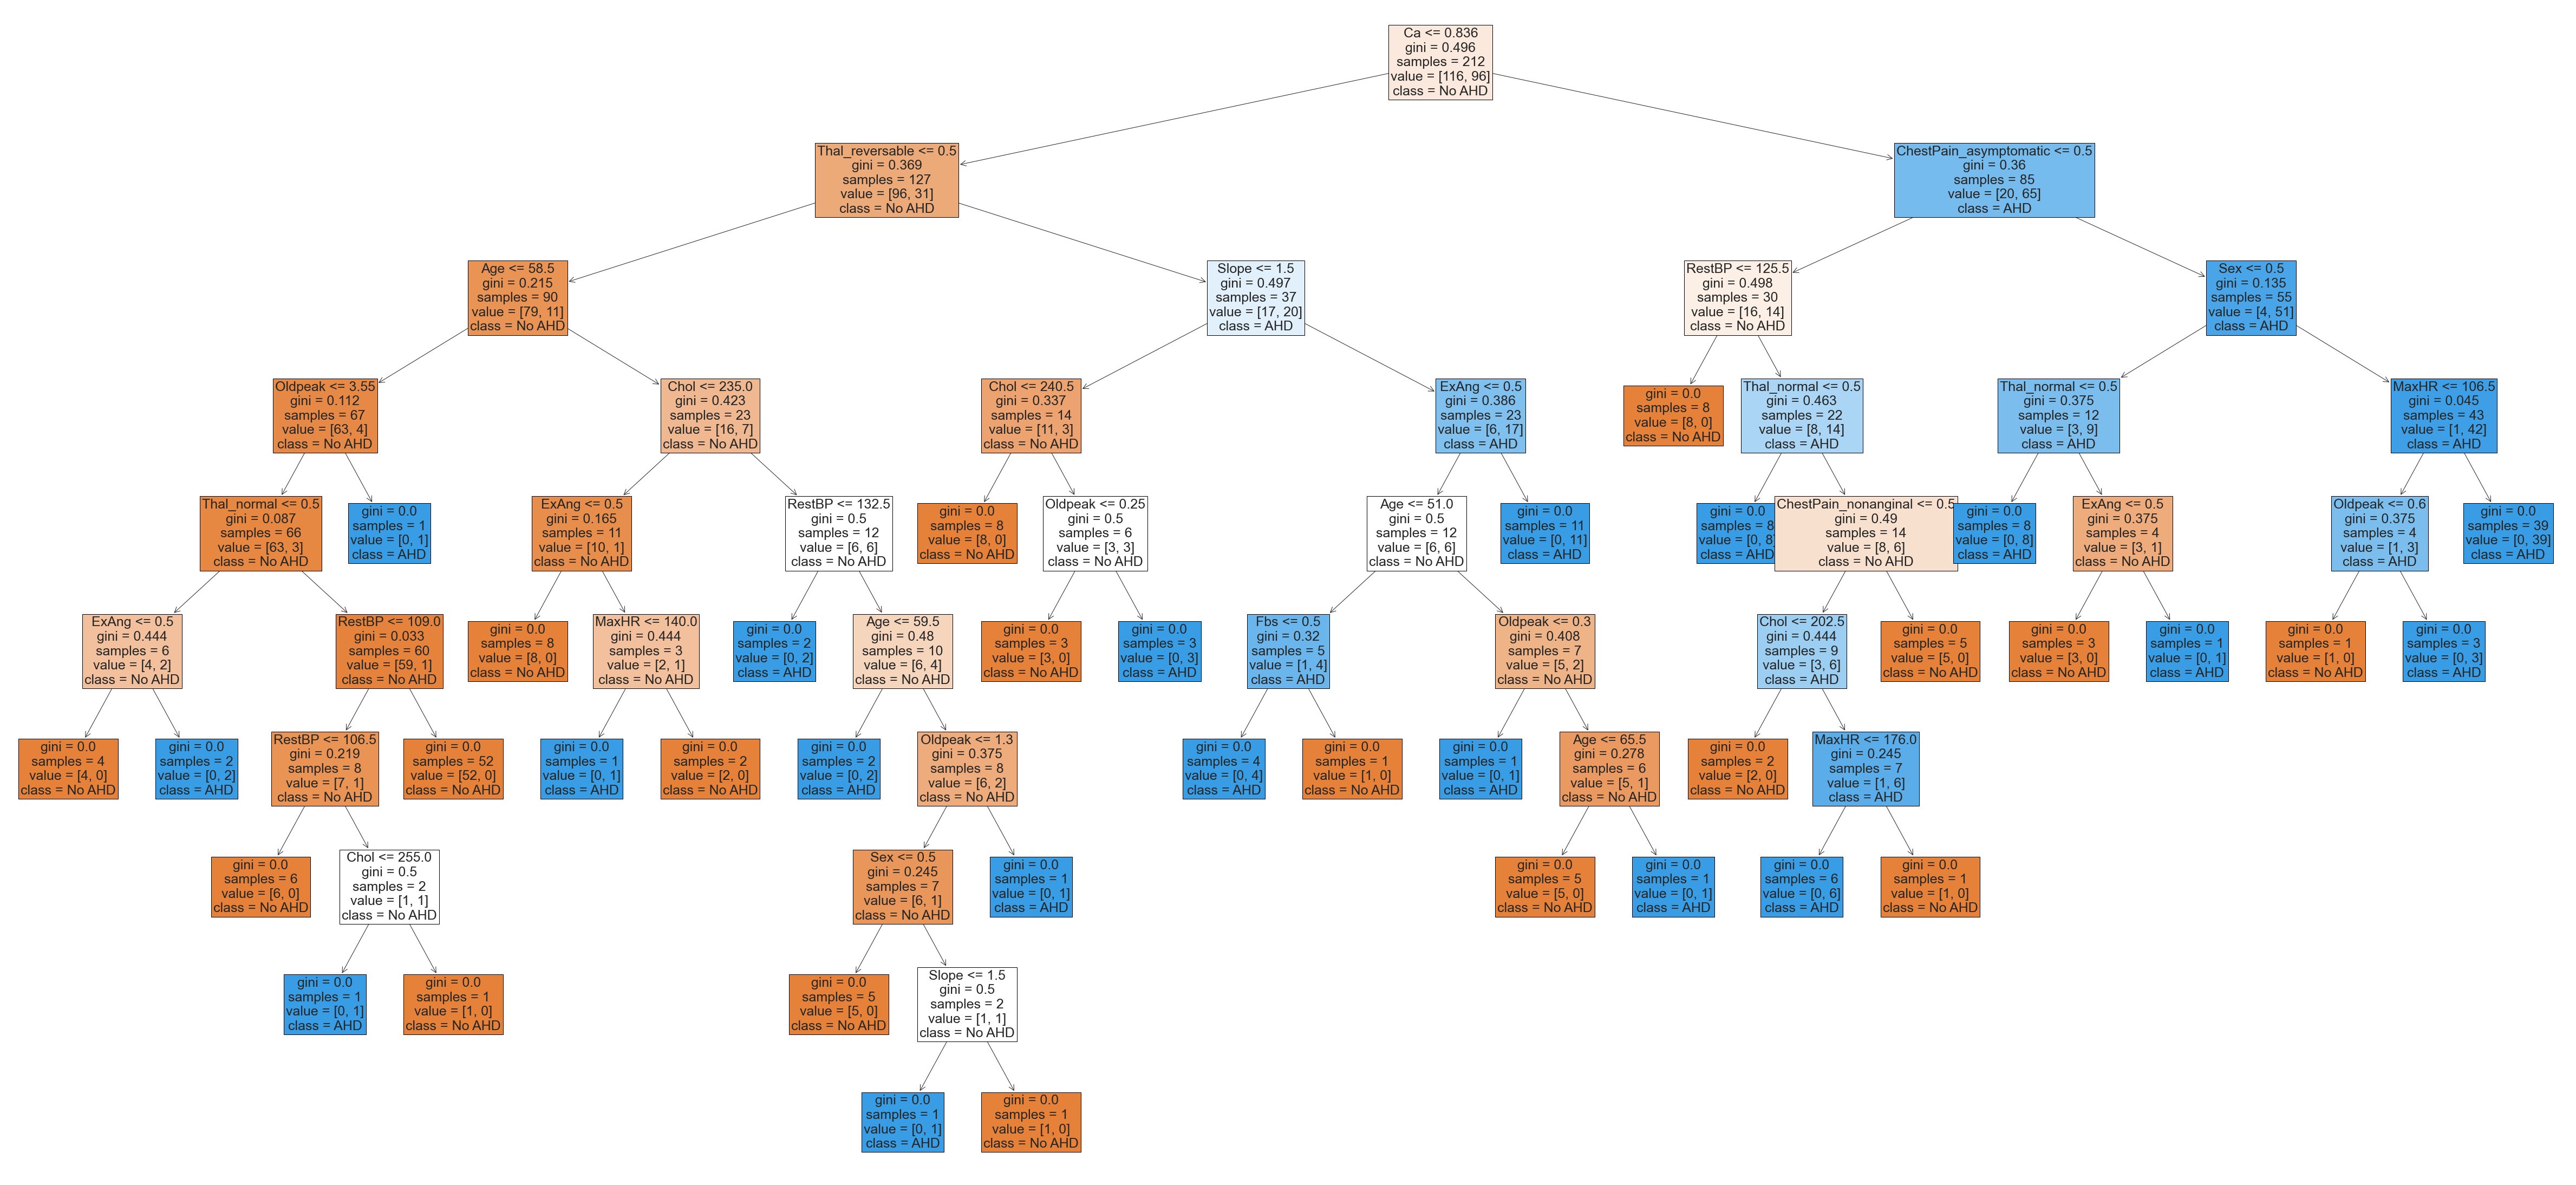

In [83]:
fig = plt.figure(figsize=(85,40))
tree.plot_tree(clf_tree,feature_names= X.columns,class_names=['No AHD', 'AHD'], fontsize = 25, filled=True)
plt.show()

### Our model has made Ca our root node leading to various decision nodes throughout our model. This shows us that Ca is most likely a key predictior for AHD Levels. Below is a scenario describing the flow process of our Decision Model. 

### Say we have a patient that has a Ca of .75 There Thal is not reversible and OldPeak  of 1.5,Thal is Normal, Rest BP of 105.6,  They are 37 years old and MaxHR of 101. How would our model classify this individual?

### Following the Tree we would find that the patient falls into what would be a no AHD classification if we had added such classifiers to our model. He goes to the left of Ca, Left of Thal_Reversible, Left of Age, right of Thal_normal left of Rest BP twice arriving at a Terminal Gini Node

In [84]:
y_predictions = clf_tree.predict(X_test)

In [85]:
acc_score = accuracy_score(y_test, y_predictions)
print(acc_score)
print("")

0.7032967032967034



In [86]:
feat_imp = pd.DataFrame(clf_tree.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([feat_imp, names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

Importance                Features
10    0.262737                      Ca
17    0.087350         Thal_reversable
8     0.083491                 Oldpeak
11    0.078403  ChestPain_asymptomatic
7     0.071591                   ExAng
16    0.070615             Thal_normal
0     0.067193                     Age
3     0.065878                    Chol
2     0.065852                  RestBP
9     0.055156                   Slope
6     0.033326                   MaxHR
12    0.027196    ChestPain_nonanginal
1     0.015982                     Sex
4     0.015230                     Fbs
5     0.000000                 RestECG
13    0.000000    ChestPain_nontypical
14    0.000000       ChestPain_typical
15    0.000000              Thal_fixed

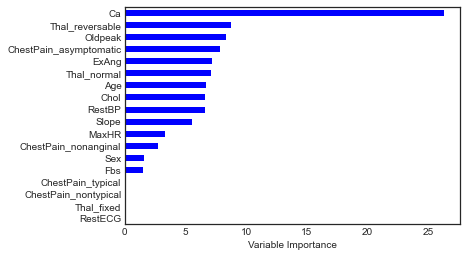

In [87]:
Importance = pd.DataFrame({'Importance':clf_tree.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [88]:
X = X.drop(['Thal_fixed','ChestPain_typical','ChestPain_nontypical', 'RestECG', 'Fbs', 'Sex', 'ChestPain_nonanginal', 'MaxHR','ExAng', 'Slope', 'Chol'], axis = 1) # removes Sales from the datafram and recallibrates the axis. 


In [89]:
X.head()

Age  RestBP  Oldpeak   Ca  ChestPain_asymptomatic  Thal_normal  \
1   63     145      2.3  0.0                       0            0   
2   67     160      1.5  3.0                       1            1   
3   67     120      2.6  2.0                       1            0   
4   37     130      3.5  0.0                       0            1   
5   41     130      1.4  0.0                       0            1   

   Thal_reversable  
1                0  
2                0  
3                1  
4                0  
5                0

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [91]:
New_tree = DecisionTreeClassifier()
New_tree.fit(X_train, y_train)
train_pred = New_tree.predict(X_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

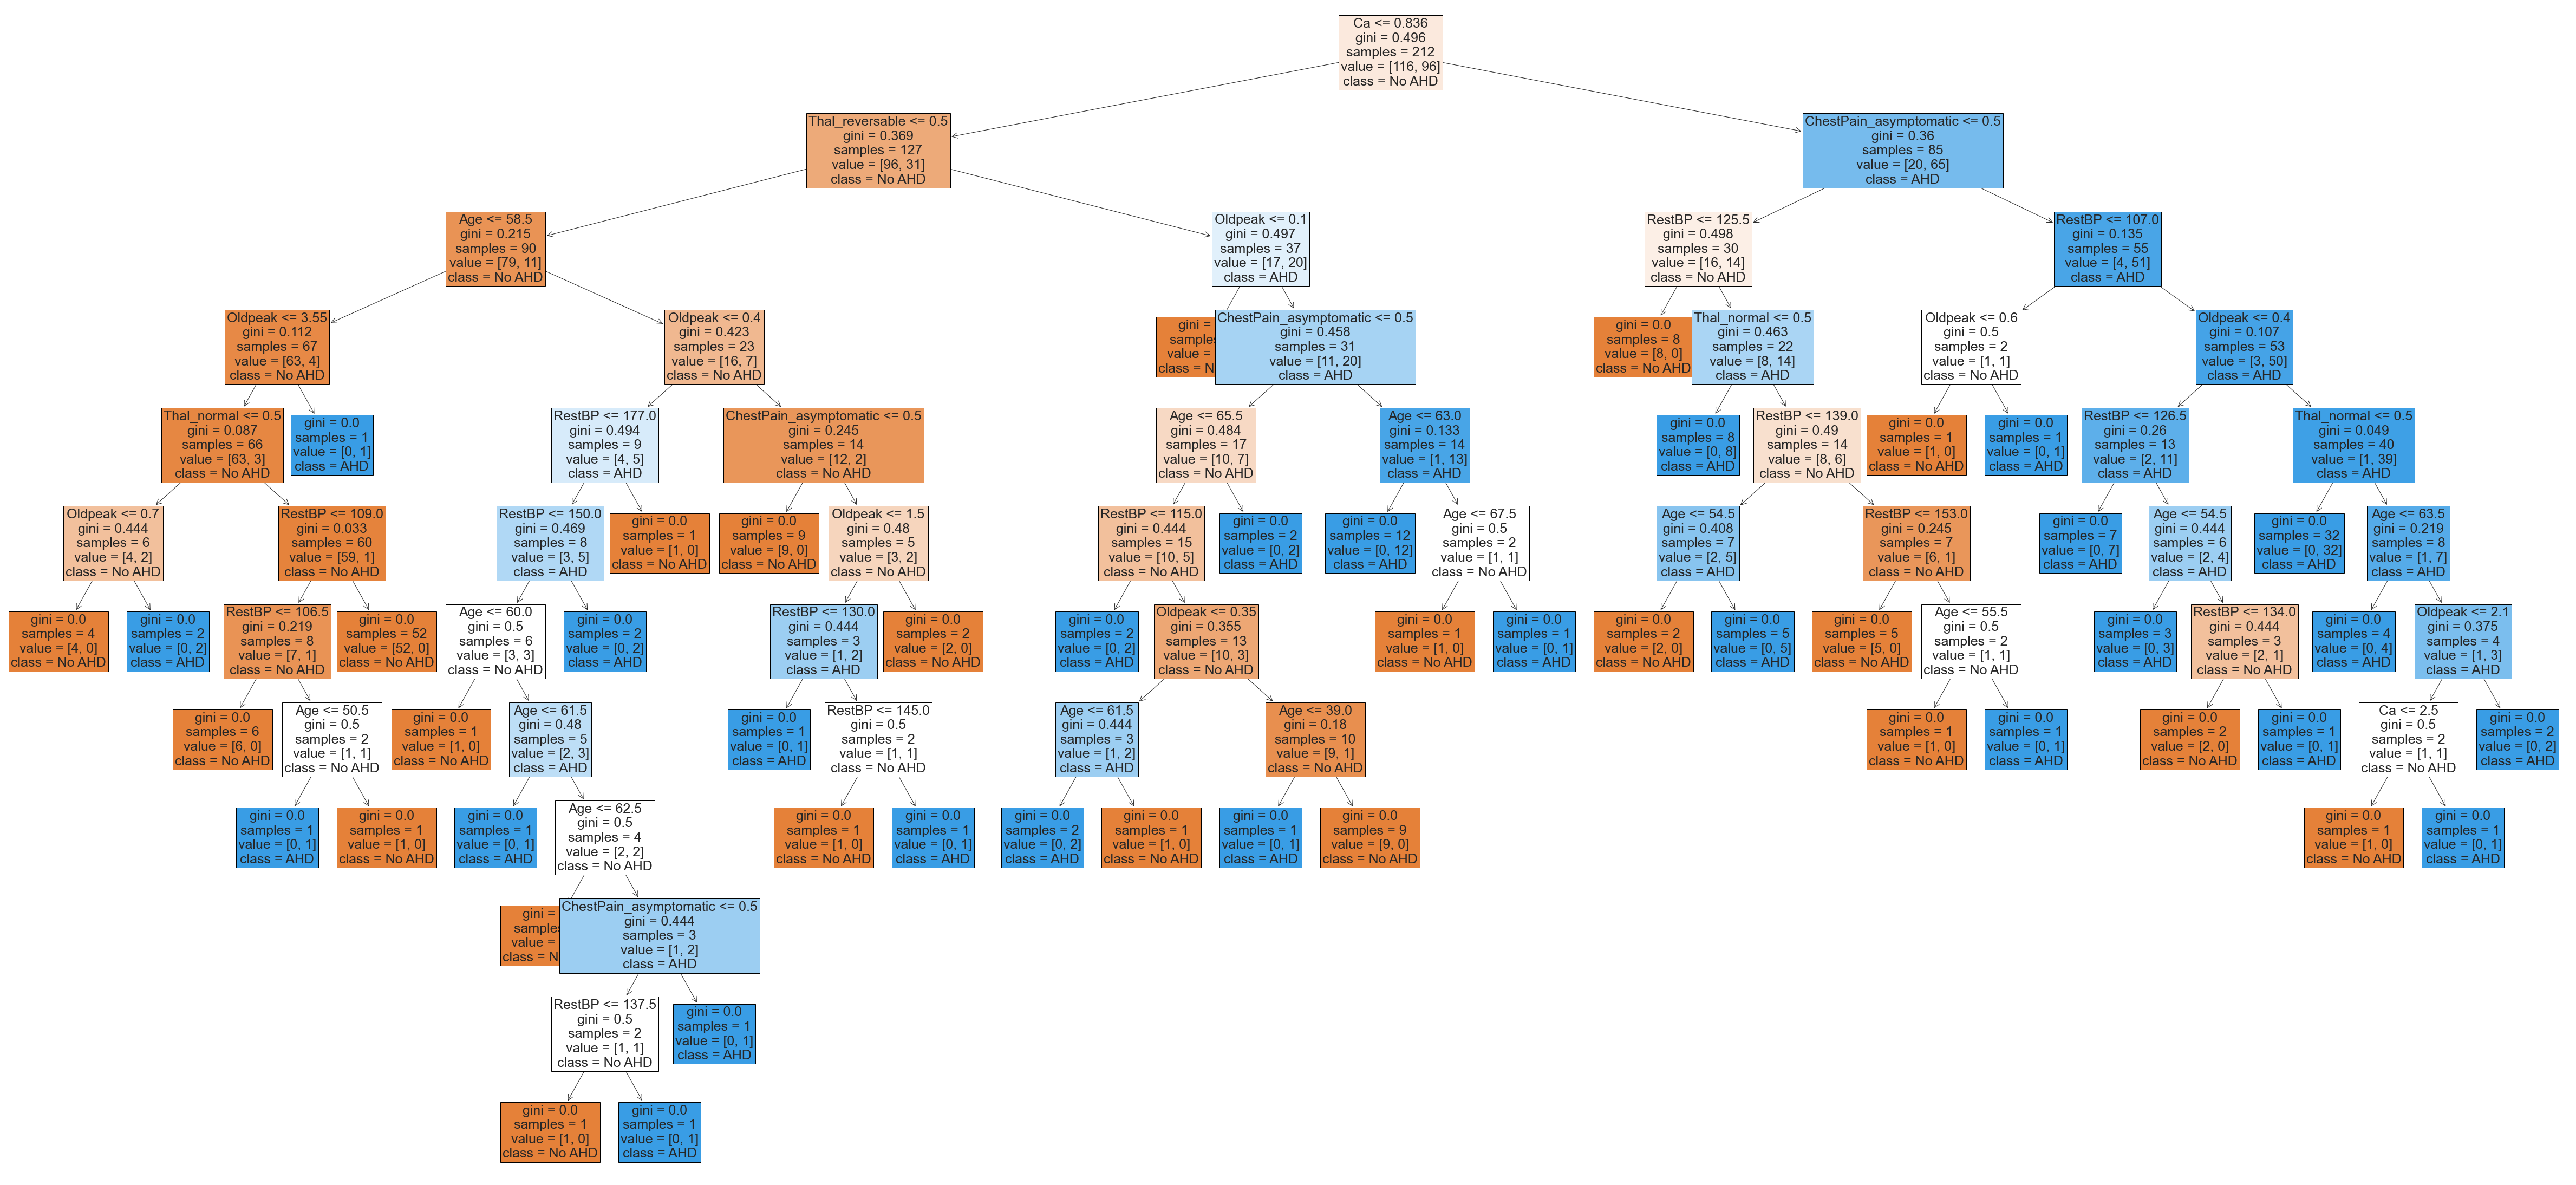

In [92]:
fig = plt.figure(figsize=(85,40))
tree.plot_tree(New_tree,feature_names= X.columns,class_names=['No AHD', 'AHD'], fontsize = 25, filled=True)
plt.show()

### Our model has made Ca our root node leading to various decision nodes throughout our model. This shows us that Ca is most likely a key predictior for AHD Levels. Below is a scenario describing the flow process of our Decision Model. 

### Say we have a patient that has a Ca of .84 There chest pain is Asympomatic and Resting BP of 134, They are 37 years old and Normal Thal readings. How would our model classify this individual?

### Since they have a Ca above our nodes threshold of .836 we would follow our tree to the right. Asympomatic Chest pain is endoded as 1 yes 0 no, so we would follow this to the right as well since their chest pain is Asympomatic. Resting BP is is 134 so again we follow right. They are only 37 though so now we follow the tree to the left to determine Thal readings. Since that was Normal (1) we now go to the right tree node. Again resting BP was 134 so we go to the right and resting BP is still over the 133 threshold which classifies the patient as AHD.

In [93]:
acc_score = accuracy_score(y_test, y_predictions)
print(acc_score)
print("")

0.7032967032967034



In [94]:
score_train = New_tree.score(X_train, y_train)
print(score_train)
print("")

1.0



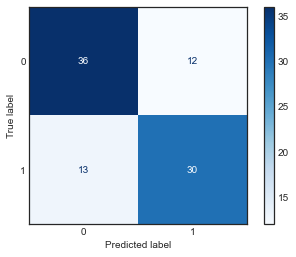

In [95]:
plot_confusion_matrix(New_tree, X_test, y_test,cmap="Blues", values_format='d')
plt.show() 

## On the far left of out Decision Tree we have a Terminal Node with the final determining fact being the OldPeak Predictor. To arrive at this node we must have incredibly low readings for Ca, Thal not being reversible, and age under 58.5, an OldPeak under 7 and an abnormal Thal reading. Once back at our OldPeak Node it uses a reading of less than .7 to classify as NoAHD and anything over that is classified as AHD. 

In [96]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import plot_roc_curve

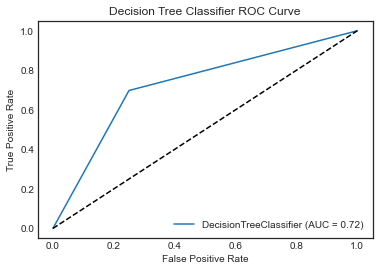

In [97]:
plot_roc_curve(New_tree, X_test, y_test)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve')
plt.show()

## According to the ROC Curve our model has abour a 74% Accuracy. While in some cases this may be considered good, we are dealing with health related data so we would want to see a signifigant increase somewhere around 90% to consider our model a success. We need to explore other modeling techiniques or refine our current model further through feature engineering. 

# Bonus Question 5

In [98]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7693244739756367 {'max_depth': 4}


In [99]:
clf = DecisionTreeClassifier(max_depth = 4) # which also correspondes to best ccp_alpha
clf.fit(X_train, y_train)
train_pred1 = clf.predict(X_train)
test_pred = clf.predict(X_test)


In [100]:
acc_score = accuracy_score(y_train, train_pred1)
print(acc_score)
print("")

0.8773584905660378



In [101]:
acc_score = accuracy_score(y_train, train_pred)
print(acc_score)
print("")

1.0



## It would appear the tree build without cross validation had a better accuracy score but is overfit so in this case we would actually prefer the lower accuracy since it is still 87.74% accuracte. 